In [1]:
# Homework 6
# Seperation and Relative Velocities of the COM of Simulated Galaxies
# Justin Ugaitafa

# import modules
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
import matplotlib

# importing from files from previous HWs
from ReadFile import Read
from CenterOfMass2 import CenterOfMass
from astropy.constants import G # imports gravitational constant

In [2]:
# Function that computes the time and COM position and velocity vectors of a given galaxy in each snapshot and saves the out put in a file
# inputs:
        #galaxy = name of galaxy
        # start = # of the first snapshot to be read in
        # end = # of the last snapshot to be read in
        # n = integer indicating intervals over which we will return the COM
# return:
        # Orbit time, velocity, and position
def OrbitCOM(galaxy, start, end, n):
        # compose the filename for output
    fileout = "Orbit_" + galaxy + ".txt"
    
    #  set tolerance and VolDec for calculating COM_P in CenterOfMass
    if (galaxy == 'MW'or galaxy == 'M31'):
        delta = 0.1
        VolDec = 2
    # for M33 that is stripped more, use different values for VolDec
    else:
        delta = 0.1
        VolDec = 4

    # generate the snapshot id sequence 
    # it is always a good idea to also check if the input is eligible (not required)
    snap_ids = np.arange(start,end+1,n)
    
    # initialize the array for orbital info: t, x, y, z, vx, vy, vz of COM
    orbit = np.zeros([snap_ids.size,7])
    
    
    # a for loop 
    for i, snap_id in enumerate(snap_ids):  # loop over files
        
        # compose the data filename (be careful about the folder)
        # add a string of the filenumber to the value "000"
        ilbl = '000' + str(snap_id)
        # remove all but the last 3 digits
        ilbl = ilbl[-3:]
        # create filenames
        filename='VLowRes/%s_'%(galaxy) + ilbl + '.txt'
        
        # Initialize an instance of CenterOfMass class, using disk particles
        galaxy_COM = CenterOfMass(filename, 2)
        
        # Store the COM pos and vel. Remember that now COM_P required VolDec
        galaxy_COM_P = galaxy_COM.COM_P(delta, VolDec)
        galaxy_COM_V = galaxy_COM.COM_V(galaxy_COM_P[0],galaxy_COM_P[1],galaxy_COM_P[2])
    
        # store the time, pos, vel in ith element of the orbit array,  without units (.value)
        orbit[i] = (galaxy_COM.time.value)/1000, galaxy_COM_P[0].value, galaxy_COM_P[1].value, galaxy_COM_P[2].value, galaxy_COM_V[0].value, galaxy_COM_V[1].value, galaxy_COM_V[2].value
        # time is divided by 1000 to ensure units of (Gyr)
        
        # note that you can store 
        # a[i] = var1, *tuple(array1) 
        
        # print snap_id to see the progress
        print(snap_id)
        #print(orbit)
        
    # write the data to a file
    # we do this because we don't want to have to repeat this process 
    # this code should only have to be called once per galaxy.
    np.savetxt(fileout, orbit, fmt = "%11.3f"*7, comments='#',
               header="{:>10s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}"\
                      .format('t', 'x', 'y', 'z', 'vx', 'vy', 'vz'))

In [3]:
# Test to recover COM data files
print("Starting to compute MW orbit")
OrbitCOM("MW",0,800,5)
print("Starting to compute M31 orbit")
OrbitCOM("M31",0,800,5)
print("Starting to compute M33 orbit")
OrbitCOM("M33",0,800,5)

Starting to compute MW orbit
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
205
210
215
220
225
230
235
240
245
250
255
260
265
270
275
280
285
290
295
300
305
310
315
320
325
330
335
340
345
350
355
360
365
370
375
380
385
390
395
400
405
410
415
420
425
430
435
440
445
450
455
460
465
470
475
480
485
490
495
500
505
510
515
520
525
530
535
540
545
550
555
560
565
570
575
580
585
590
595
600
605
610
615
620
625
630
635
640
645
650
655
660
665
670
675
680
685
690
695
700
705
710
715
720
725
730
735
740
745
750
755
760
765
770
775
780
785
790
795
800
Starting to compute M31 orbit
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
205
210
215
220
225
230
235
240
245
250
255
260
265
270
275
280
285
290
295
300
305
310
315
320
325
330
335
340
345
350
355
360
365
370
375
380
385
390
395
400
405
410
415
420
4

In [4]:
# Reads in data files for orbits of the above code for each galaxy
MWOrbData = np.genfromtxt("Orbit_MW.txt",dtype=None,names=True)
M31OrbData = np.genfromtxt("Orbit_M31.txt",dtype=None,names=True)
M33OrbData = np.genfromtxt("Orbit_M33.txt",dtype=None,names=True)

In [5]:
# function to compute the magnitude of the difference between two vectors 
# You can use this function to return both the relative position and relative velocity for two 
# galaxies over the entire orbit  
def relative_mag(orbit1, orbit2): 
    # Input: 3D vector 1 , 3D vector 2
    # returns the magnitude of the relative position and velocities
    pos =  np.sqrt( (orbit1['x']-orbit2['x'])**2 + (orbit1['y']-orbit2['y'])**2 + (orbit1['z']-orbit2['z'])**2)
    vel =  np.sqrt( (orbit1['vx']-orbit2['vx'])**2 + (orbit1['vy']-orbit2['vy'])**2 + (orbit1['vz']-orbit2['vz'])**2)
    return pos,vel


In [7]:
# Determine the magnitude of the relative position and velocities 

# of MW and M31
M31_MW_R, M31_MW_V = relative_mag(MWOrbData, M31OrbData)

# of M33 and M31
M33_M31_R, M33_M31_V = relative_mag(M31OrbData, M33OrbData)

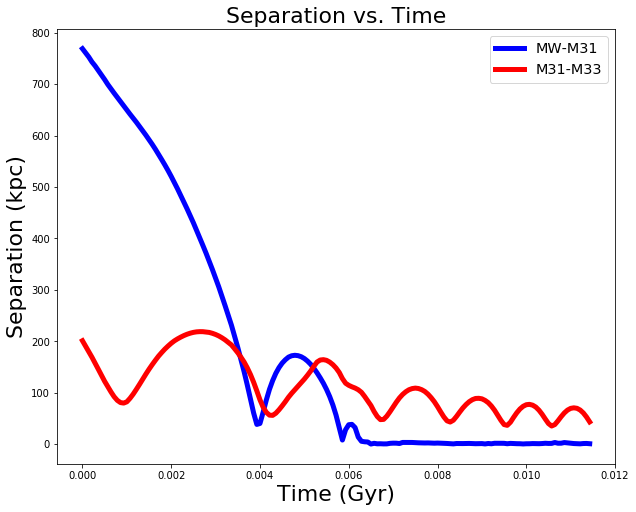

In [8]:
# Plot the Orbit of the galaxies 
#################################


fig, ax= plt.subplots(figsize=(10, 8))


# Plot the separtion of M31 and MW
ax.plot(MWOrbData['t']/1e3, M31_MW_R, color='blue', linewidth=5, label='MW-M31')

# Plot the separtion of M33 and M31
ax.plot(M31OrbData['t']/1e3, M33_M31_R, color='red', linewidth=5, label='M31-M33')

# Add axis labels
plt.xlabel('Time (Gyr)', fontsize=22)
plt.ylabel('Separation (kpc)', fontsize=22)

# Set the title
ax.set_title("Separation vs. Time", fontsize=22)


#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# add a legend with some customizations.
legend = ax.legend(loc='upper right',fontsize='x-large')

# save 
fig.savefig('orbit_sep.pdf')

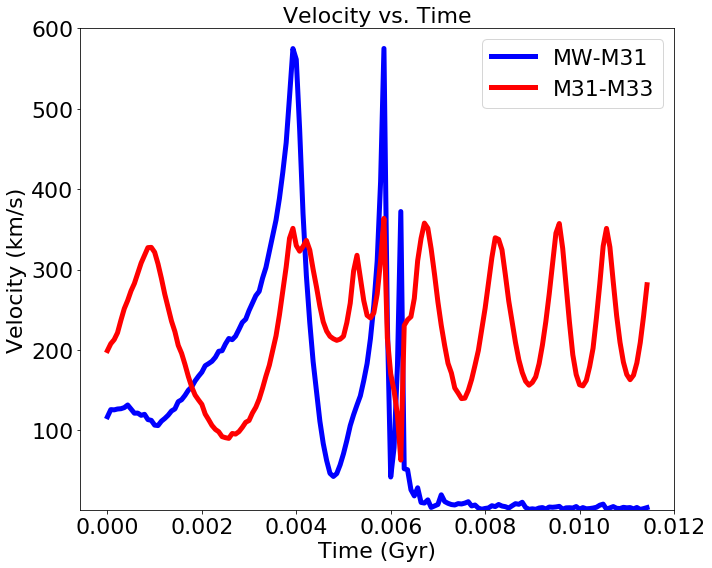

In [9]:
# Plot the orbital velocities of the galaxies 
#################################

fig, ax= plt.subplots(figsize=(10, 8))

# Plot the velocities of M31 and MW
ax.plot(MWOrbData['t']/1e3, M31_MW_V, 'b', lw=5, label='MW-M31')

# Plot the velocities of M33 and M31
ax.plot(MWOrbData['t']/1e3, M33_M31_V, 'r', lw=5, label='M31-M33')

# Add axis labels
ax.set_xlabel('Time (Gyr)', fontsize=22)
ax.set_ylabel('Velocity (km/s)', fontsize=22)
ax.set_title("Velocity vs. Time", fontsize=22)

#set axis limits
ax.set_ylim([1, 600])

#adjust tick label font size
ax.xaxis.set_tick_params(labelsize=22)
ax.yaxis.set_tick_params(labelsize=22)

# add a legend with some customizations.
legend = ax.legend(loc='upper right',fontsize=22)

# tight layout
fig.tight_layout()

# Save to a file
fig.savefig('orbit_vel.pdf')

In [11]:
# Answers to questions
######################

# Q1: 2 encounters and then they merge on the 3rd encounter

# Q2: The velocity peaks when the separation is smallest and is at a minimum when the separation is largest.
#     Energy is being exchanged - from potential energy to kinetic at pericenter. The opposite occurs at
#     apocenter.

# Q3: a) MW-M31 Merger will occur in ~ 6.5 Gyr Note that the force resolution (gravitational softening) of the
#        N-body is of order 3 kpc. Separations a few times that scale are not going to be well resolved.

# Q3: b) M33's orbit is slowly decaying over time, but the orbit does change a bit at the time of the merger
#        and starts to decay more quickly. This is because there is more material in the central regions of
#        the combined MW+M31 object than about M31 alone.


In [15]:
# BONUS: 



# Q4:

#  The orbital period decays from ~110 to 90 over 1.5 Gyr then from 90 to 75 over 1.2 Gyr if this rate of
#  decay were to continue, you would expect it to take 75 /[(110-90)/1.5] ~ 5.6 Gyr for the orbit of M33 to
#  decay from 75 kpc.

#  BUT the rate of decay is slowing down by the end of the simulation - rate of (75-70)kpc/1 Gyr ~ 4 kpc/Gyr.
#  At that rate it would take more than 20 Gyr to merge! Galaxies merge because their orbits decay owing to 
#  dynamical friction. This friction term scales with the mass of the galaxy. As M33's mass is stripped by 
#  tidal effects, the strength of dynamical friction weakens and the decay rate of the orbit slows. It will 
#  take a very long time for the M33 remnant to merge!

#  This fits well with the expectations if you fit an exponential decay rate - like Andy Henrici did.